In [1]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

## Using PyPDF directly

In [30]:
from pypdf import PdfReader

reader = PdfReader("data/dagpengeguide-2023.pdf")
number_of_pages = len(reader.pages)
page_sample = reader.pages[4]
text_sample = page_sample.extract_text()
text_sample

'5Vær opmærksom på, at hvis du udebliver fra et \nmøde eller en samtale uden at melde afbud, \nmister du dagpenge fra mødedagen, og indtil \ndu igen har kontaktet mødeindkalderen. Du mi -\nster også dagpenge, hvis du melder afbud af \nandre årsager end dem, der er nævnt ovenfor.\nDu skal selv booke tid til jobsamtaler og \nrådighedssamtaler  \nDu skal selv booke jobsamtaler på jobcentret \neller hos anden aktør på jobnet.dk. Du skal også \nselv booke to rådighedssamtaler med os inden \nfor de første seks måneders ledighed. Du får et \nelektronisk brev fra jobcentret eller os, når det \ner tid til at booke en samtale. Du skal booke \nsamtalen inden for den angivne frist. Hvis du \nikke kan finde en ledig tid inden for fristen, skal \ndu kontakte dem, der har sendt dig brevet.\nHvis du ikke booker en samtale \nHvis du ikke har booket en samtale inden for \nden angivne frist, vil du blive afmeldt på jobnet.\ndk uden påmindelse. Du kan først få dagpenge \nigen, når du igen er tilmeldt.\nHv

## Using LangChain PyPDFLoader (A Wrapper around PyPDF)
**Same result**

In [164]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("data/dagpengeguide-2023.pdf")
raw_pdf =loader.load()
raw_pdf[4].page_content

'5Vær opmærksom på, at hvis du udebliver fra et \nmøde eller en samtale uden at melde afbud, \nmister du dagpenge fra mødedagen, og indtil \ndu igen har kontaktet mødeindkalderen. Du mi -\nster også dagpenge, hvis du melder afbud af \nandre årsager end dem, der er nævnt ovenfor.\nDu skal selv booke tid til jobsamtaler og \nrådighedssamtaler  \nDu skal selv booke jobsamtaler på jobcentret \neller hos anden aktør på jobnet.dk. Du skal også \nselv booke to rådighedssamtaler med os inden \nfor de første seks måneders ledighed. Du får et \nelektronisk brev fra jobcentret eller os, når det \ner tid til at booke en samtale. Du skal booke \nsamtalen inden for den angivne frist. Hvis du \nikke kan finde en ledig tid inden for fristen, skal \ndu kontakte dem, der har sendt dig brevet.\nHvis du ikke booker en samtale \nHvis du ikke har booket en samtale inden for \nden angivne frist, vil du blive afmeldt på jobnet.\ndk uden påmindelse. Du kan først få dagpenge \nigen, når du igen er tilmeldt.\nHv

In [165]:
print(raw_pdf[4].page_content)

5Vær opmærksom på, at hvis du udebliver fra et 
møde eller en samtale uden at melde afbud, 
mister du dagpenge fra mødedagen, og indtil 
du igen har kontaktet mødeindkalderen. Du mi -
ster også dagpenge, hvis du melder afbud af 
andre årsager end dem, der er nævnt ovenfor.
Du skal selv booke tid til jobsamtaler og 
rådighedssamtaler  
Du skal selv booke jobsamtaler på jobcentret 
eller hos anden aktør på jobnet.dk. Du skal også 
selv booke to rådighedssamtaler med os inden 
for de første seks måneders ledighed. Du får et 
elektronisk brev fra jobcentret eller os, når det 
er tid til at booke en samtale. Du skal booke 
samtalen inden for den angivne frist. Hvis du 
ikke kan finde en ledig tid inden for fristen, skal 
du kontakte dem, der har sendt dig brevet.
Hvis du ikke booker en samtale 
Hvis du ikke har booket en samtale inden for 
den angivne frist, vil du blive afmeldt på jobnet.
dk uden påmindelse. Du kan først få dagpenge 
igen, når du igen er tilmeldt.
Hvis du er blevet afmeldt

# Recursive splitting

Recursive Character Text Splitter attempts to split text using the characters from a list in order until the resulting chunks are small enough. By default, the list of characters used for splitting is ["\n\n", "\n", " ", "], which tries to keep paragraphs, sentences, and words together as long as possible, as they are generally the most semantically related pieces of text. This means that the class first tries to split the text into two new-line characters. If the resulting chunks are still larger than the desired chunk size, it will then try to split the output by a single new-line character, followed by a space character, and so on, until the desired chunk size is achieved.

In [125]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# create a text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, 
                                               chunk_overlap=50,
                                               length_function=len,
                                               )

#loader = PyPDFLoader("data/dagpengeguide-2023.pdf")
#raw_pdf =loader.load()

In [135]:
#load and split defaults to recursiveCharacterTextSplitter anyway, but for clarity I define it
pages_recursive = loader.load_and_split(text_splitter=text_splitter)

In [136]:
pages_recursive[10]

Document(page_content='møder og samtaler du skal til og hvornår under \net ledighedsforløb på to år.\nKom til møderne og samtalerne \nDu skal altid  være tilgængelig på telefonen eller \nkomme til det virtuelle eller fysiske møde med \nos. Det er f.eks. dit ansvar, at sørge for, at være \nlogget på et virtuelt møde til tiden eller sørge \nfor at godkende vores nummer/jobcenterets \nnummer på din telefon hvis den er sat op til at \nbegrænse adgang for ukendte numre. Husk at \nmelde afbud, hvis du er forhindret i at holde', metadata={'source': 'data/dagpengeguide-2023.pdf', 'page': 3})

In [170]:
print(pages_recursive[15].page_content)

ket en samtale hos os, kontakter vi dig og giver 
dig en ny frist til at booke en ny samtale, når 
du har tilmeldt dig på jobnet.dk. Booker du ikke 
inden for den nye frist, bliver du igen afmeldt.
Fritagelse fra selv at booke samtaler 
Du kan i ganske særlige tilfælde anmode om at 
blive fritaget fra selv at booke samtaler. Kon -
takt dit jobcenter eller anden aktør, hvis du vil 
anmode om fritagelse fra at booke jobsamta -
ler hos dem. Kontakt os, hvis du vil anmode om


## On Tokens instead of chars
**Seems like sentences are no longer split by meaningfull characters line line changes and .**

By calling tiktokken_encoder

"We can use RecursiveCharacterTextSplitter.from_tiktoken_encoder to make sure splits are not larger than chunk size of tokens allowed by the language model, where each split will be recursively split if it has a larger size."

In [138]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# create a text splitter
text_splitter_token = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, 
                                               chunk_overlap=50)


#load and split defaults to recursiveCharacterTextSplitter anyway, but for clarity I define it
pages_token = loader.load_and_split(text_splitter=text_splitter_token)

print(pages_token[4])

page_content='tager dagpenge, skal du ud over vejlednings -\nsamtalen til to rådighedssamtaler med os. Du \nkan selv vælge om du vil møde op fysisk eller \nom samtalen skal foregå digitalt eller telefonisk. \nDu skal desuden til seks samtaler i dit lokale \njobcenter. De indkalder dig til den første sam -\ntale, herefter vil du blive bedt om selv at boo -ke tid til en samtale hos dem. Vi deltager i en \nfælles samtale sammen med dig hos jobcen -\ntret den 2. eller 3. måned og i 5. eller 6. måned, \nhvor du er ledig. Hvis du ikke ønsker, at vi  delta -\nger, skal du give besked om det, når du er til en \nsamtale hos os eller jobcentret.\nEfter det første halve år \nEfter seks måneders ledighed skal du til sam -\ntale hos jobcentret eller anden aktør cirka hver \ntredje måned. Du skal kun til samtale hos os, \nhvis din jobsøgning ikke lever op til den aftale, \nvi sammen har indgået, eller hvis vi af andre \ngrunde skulle komme i tvivl om din rådighed.\nHvis du fortsat er ledig efter 16 

In [139]:
print(pages_token[4].page_content)

tager dagpenge, skal du ud over vejlednings -
samtalen til to rådighedssamtaler med os. Du 
kan selv vælge om du vil møde op fysisk eller 
om samtalen skal foregå digitalt eller telefonisk. 
Du skal desuden til seks samtaler i dit lokale 
jobcenter. De indkalder dig til den første sam -
tale, herefter vil du blive bedt om selv at boo -ke tid til en samtale hos dem. Vi deltager i en 
fælles samtale sammen med dig hos jobcen -
tret den 2. eller 3. måned og i 5. eller 6. måned, 
hvor du er ledig. Hvis du ikke ønsker, at vi  delta -
ger, skal du give besked om det, når du er til en 
samtale hos os eller jobcentret.
Efter det første halve år 
Efter seks måneders ledighed skal du til sam -
tale hos jobcentret eller anden aktør cirka hver 
tredje måned. Du skal kun til samtale hos os, 
hvis din jobsøgning ikke lever op til den aftale, 
vi sammen har indgået, eller hvis vi af andre 
grunde skulle komme i tvivl om din rådighed.
Hvis du fortsat er ledig efter 16 måneder, del -
tager vi igen i en

## Problem of loading PDFs: Cleaning the text
Visual format: Line breaks are loaded as \n despite not being a semantic linebreak. Such as below snippet from the above:

*Denne pjece er din guide, mens du modtager dagpenge. Den handler \nom, hvilke overordnede krav der bliver stillet til dig, hvilke rettigheder du \nhar, og hvordan vi kan hjælpe dig. Du skal læse guiden, inden du kom -\nmer til dit første møde hos os.*

Hence to get the correct line breaks we will add a small heuristic function to join lines accordingly.

In [280]:
raw_pdf[4].page_content

'5Vær opmærksom på, at hvis du udebliver fra et \nmøde eller en samtale uden at melde afbud, \nmister du dagpenge fra mødedagen, og indtil \ndu igen har kontaktet mødeindkalderen. Du mi -\nster også dagpenge, hvis du melder afbud af \nandre årsager end dem, der er nævnt ovenfor.\nDu skal selv booke tid til jobsamtaler og \nrådighedssamtaler  \nDu skal selv booke jobsamtaler på jobcentret \neller hos anden aktør på jobnet.dk. Du skal også \nselv booke to rådighedssamtaler med os inden \nfor de første seks måneders ledighed. Du får et \nelektronisk brev fra jobcentret eller os, når det \ner tid til at booke en samtale. Du skal booke \nsamtalen inden for den angivne frist. Hvis du \nikke kan finde en ledig tid inden for fristen, skal \ndu kontakte dem, der har sendt dig brevet.\nHvis du ikke booker en samtale \nHvis du ikke har booket en samtale inden for \nden angivne frist, vil du blive afmeldt på jobnet.\ndk uden påmindelse. Du kan først få dagpenge \nigen, når du igen er tilmeldt.\nHv

In [140]:
def process_text(text: str) -> str:
    # Remove '-\n' patterns and split into lines
    lines = text.replace(' -\n', '').split('\n')
    # Remove empty lines
    lines = [line for line in lines if line.strip()]

    processed_lines = []

    for i, line in enumerate(lines):
        #First if statement: If line ends with . ! or ? and it's not the last line, add to the result with a newline.
        if line.strip().endswith(('.', '!', '?')) and i < len(lines) - 1:
            #if next line starts with a capital letter, add to the result with a newline.
            if lines[i + 1][0].isupper():
                processed_lines.append(line + '\n\n')
            else:
                processed_lines.append(line)
        #Second if statement: If it is the last line of the page, add to the result with a newline.
        elif i == len(lines) - 1:
            processed_lines.append(line + '\n\n')
        #Otherwise, join the sentences with a space.
        else:
            processed_lines.append(line)
        
    # Join the processed lines without additional spaces because they are already added as needed.
    return ''.join(processed_lines)

**Some edge cases**
The elif statement was added to deal with edge cases where a \n followed by a . without it actually being a new sentence, like in this example:

*\nHvis du ikke har booket en samtale inden for \nden angivne frist, vil du blive afmeldt på jobnet.\ndk uden påmindelse.*

where we don't want to split the sentence. The heuristic is that we only want to split, if the following line starts with a Capital letter 

In [141]:
processed_text_sample = process_text(raw_pdf[4].page_content)
print(processed_text_sample)

5Vær opmærksom på, at hvis du udebliver fra et møde eller en samtale uden at melde afbud, mister du dagpenge fra mødedagen, og indtil du igen har kontaktet mødeindkalderen. Du mister også dagpenge, hvis du melder afbud af andre årsager end dem, der er nævnt ovenfor.

Du skal selv booke tid til jobsamtaler og rådighedssamtaler  Du skal selv booke jobsamtaler på jobcentret eller hos anden aktør på jobnet.dk. Du skal også selv booke to rådighedssamtaler med os inden for de første seks måneders ledighed. Du får et elektronisk brev fra jobcentret eller os, når det er tid til at booke en samtale. Du skal booke samtalen inden for den angivne frist. Hvis du ikke kan finde en ledig tid inden for fristen, skal du kontakte dem, der har sendt dig brevet.

Hvis du ikke booker en samtale Hvis du ikke har booket en samtale inden for den angivne frist, vil du blive afmeldt på jobnet.dk uden påmindelse. Du kan først få dagpenge igen, når du igen er tilmeldt.

Hvis du er blevet afmeldt, fordi du ikke ha

In [142]:
"""
#ChatGPTs answer to a more elegant solution 

def process_text(text: str) -> str:
    # Remove '-\n' patterns and split into lines
    lines = text.replace(' -\n', '').split('\n')
    # Remove empty lines
    lines = [line for line in lines if line.strip()]

    processed_lines = []

    for i, line in enumerate(lines):
        # Append the current line as is for now
        processed_lines.append(line)

        # If it's the last line or ends with punctuation and the next line starts with uppercase, append a newline
        if i == len(lines) - 1:
            processed_lines.append('\n\n')
        elif line.strip().endswith(('.', '!', '?')):
            # Ensure i+1 is within bounds and starts with uppercase before appending newline
            if i+1 < len(lines) and lines[i+1] and lines[i+1][0].isupper():
                processed_lines.append('\n\n')
            else:
                processed_lines.append(' ')
        else:
            processed_lines.append(' ')

    return ''.join(processed_lines).strip()

"""

"\n#ChatGPTs answer to a more elegant solution \n\ndef process_text(text: str) -> str:\n    # Remove '-\n' patterns and split into lines\n    lines = text.replace(' -\n', '').split('\n')\n    # Remove empty lines\n    lines = [line for line in lines if line.strip()]\n\n    processed_lines = []\n\n    for i, line in enumerate(lines):\n        # Append the current line as is for now\n        processed_lines.append(line)\n\n        # If it's the last line or ends with punctuation and the next line starts with uppercase, append a newline\n        if i == len(lines) - 1:\n            processed_lines.append('\n\n')\n        elif line.strip().endswith(('.', '!', '?')):\n            # Ensure i+1 is within bounds and starts with uppercase before appending newline\n            if i+1 < len(lines) and lines[i+1] and lines[i+1][0].isupper():\n                processed_lines.append('\n\n')\n            else:\n                processed_lines.append(' ')\n        else:\n            processed_lines.ap

### Processing the raw PDF to correct for semantic line breaks

In [143]:
#Apply the process_text function too all pages of the raw_pdf[i].page_content while maintaing the Document object structure
processsed_pdf = raw_pdf.copy()
for i in range(len(raw_pdf)):
    processsed_pdf[i].page_content = process_text(raw_pdf[i].page_content)

In [91]:
print(processsed_pdf[4].page_content)

5Vær opmærksom på, at hvis du udebliver fra et møde eller en samtale uden at melde afbud, mister du dagpenge fra mødedagen, og indtil du igen har kontaktet mødeindkalderen. Du mister også dagpenge, hvis du melder afbud af andre årsager end dem, der er nævnt ovenfor.

Du skal selv booke tid til jobsamtaler og rådighedssamtaler  Du skal selv booke jobsamtaler på jobcentret eller hos anden aktør på jobnet.dk. Du skal også selv booke to rådighedssamtaler med os inden for de første seks måneders ledighed. Du får et elektronisk brev fra jobcentret eller os, når det er tid til at booke en samtale. Du skal booke samtalen inden for den angivne frist. Hvis du ikke kan finde en ledig tid inden for fristen, skal du kontakte dem, der har sendt dig brevet.

Hvis du ikke booker en samtale Hvis du ikke har booket en samtale inden for den angivne frist, vil du blive afmeldt på jobnet.dk uden påmindelse. Du kan først få dagpenge igen, når du igen er tilmeldt.

Hvis du er blevet afmeldt, fordi du ikke ha

## Applying .split_documents on the cleaned text

In [182]:
# create a text splitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, 
                                               chunk_overlap=50
                                               )

In [183]:
pages_processed_recursive = text_splitter.split_documents(processsed_pdf)

In [192]:
print(pages_processed_recursive[41].page_content)

21Kontakt uddannelsesstedetKontakt uddannelsesstedet, hvis du er i tvivl om, hvilke muligheder du har for uddannelse og merit. Uddannelsesstedet kan lave en realkompetencevurdering for dig for at klarlægge dine muligheder.

Dagpenge med 80 procent sats og lånemulighedMens du deltager i uddannelsen, modtager du dagpenge med 80 procent af højeste sats. Du har derudover mulighed for at låne det resterende beløb op til din hidtidige dagpengesats med fradrag af 37 procent (svarende til almindelig skattesats). Hvis du ønsker at indgå aftale om lån, skal du underskrive et lånedokument, som vi sender til dig.

Dagpenge med 100 procent satsHvis du deltager i en uddannelse, som er rettet mod et fag, hvor der er “mangel på arbejdskraft”, har du mulighed for at kunne modtage dagpenge med din almindelige dagpengesats. 

Uddannelsen skal fremgå af en særlig liste, som offentliggøres af Styrelsen for Arbejdsmarked og Rekruttering. Tal med dit jobcenter om listen.

Under uddannelsen fritages du fra at

**Using TikToken to verify that the texts has been split correctly**

In [205]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

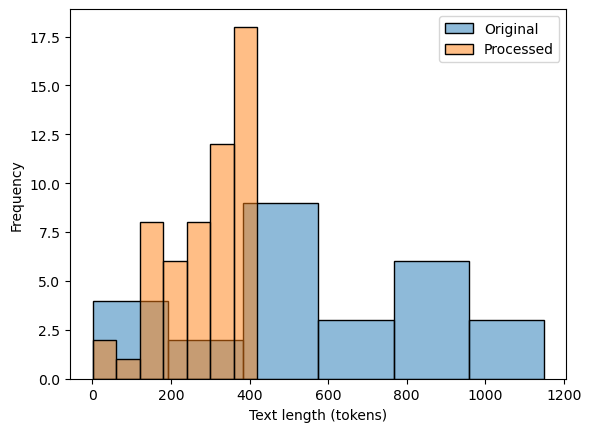

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
#Apply the num_tokens_from_string for each page_content in the pages_processed_recursive list and plot a histogram of the results
page_lengths = [num_tokens_from_string(page.page_content, "cl100k_base") for page in processsed_pdf]
processed_page_lengths = [num_tokens_from_string(page.page_content, "cl100k_base") for page in pages_processed_recursive]

#Make a histogram of the page processed page lengths and the original page lengths with alpha=0.5 to see the difference
sns.histplot(page_lengths, alpha=0.5)
sns.histplot(processed_page_lengths, alpha=0.5)
plt.xlabel("Text length (tokens)")
plt.ylabel("Frequency")
plt.legend(["Original", "Processed"])
plt.show()

# Embeddings

In [242]:
from sentence_transformers import SentenceTransformer, util

query_1 = "Kan jeg tage en uddannelse, mens jeg får dagpenge?"
query_2 = "Hvor lang tid kan jeg få dagpenge?"
query_3 = "Hvor skal jeg booke jobsamtaler henne?"

query_list = [query_1, query_2, query_3]

In [212]:
processed_docs = [page.page_content for page in pages_processed_recursive]

In [234]:
#Correct answers
answer_1 = [processed_docs[38],processed_docs[39],processed_docs[40]]
answer_1_index = [38,39,40]

answer_2 = [processed_docs[19],processed_docs[20]]
answer_2_index = [19,20]

answer_3 = [processed_docs[6]]
answer_3_index = [6]

In [285]:
processed_docs[40]

'UddannelsesløftMens du er ledig, har du mulighed for at tage en erhvervsuddannelse efter puljen til uddannelsesløft. Der gælder forskellige betingelser alt efter din situation. Fælles gælder det dog, at:• Du skal være dagpengemodtager     • Du skal være fyldt 30 år • Mindst 4/5 af uddannelsen skal kunne gen- nemføres inden for din dagpengeperiode.   • Hvis hele uddannelsen ikke gennemføres  inden for dagpengeperioden, skal du være  villig til at gennemføre resten af uddannel-  sen på almindelige vilkår.\n\nUd over disse betingelser afhænger dine muligheder af, om du i forvejen har gennemført en erhvervsuddannelse eller en del af en.Uddannelse'

In [252]:
#Create a dict to store models and their top k indexes of search results

# Global dictionary
model_dict_indices = {}

model_dict_indices['correct'] = {}
model_dict_indices['correct']['query_1'] = answer_1_index
model_dict_indices['correct']['query_2'] = answer_2_index
model_dict_indices['correct']['query_3'] = answer_3_index
model_dict_indices


{'correct': {'query_1': [38, 39, 40], 'query_2': [19, 20], 'query_3': [6]}}

**Function to calculate the top k documents for each query and store it in the model_dict_indices dictionary for plotting**

In [326]:
def update_top_n_docs(model_name, query_emb_list, doc_emb_list, sim_function=util.dot_score, top_k=5):
    
    model_dict_indices[model_name] = {}  # Initialize nested dictionary for the current model

    for i, query_emb in enumerate(query_emb_list, 1):      
        scores = sim_function(query_emb, doc_emb_list)[0].cpu().tolist()

        # Pair docs with scores and their indices
        doc_score_pairs = list(enumerate(zip(processed_docs, scores)))
        
        # Sort the paired list based on scores
        doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1][1], reverse=True)
        
        #print(f'Query: {query} \n\n')
        
        # To store top 5 indices for current query
        top_indices_for_query = []

        for index, (doc, score) in doc_score_pairs[:top_k]:
            #print(f'Document w. score {score} \n {doc} \n\n')
            top_indices_for_query.append(index)

        # Save the indices to the global dictionary
        model_dict_indices[model_name][f"query_{i}"] = top_indices_for_query
    
    return None


In [336]:
def sentence_embedding(docs_to_embed, hf_path, normalize_emb=False):
    model = SentenceTransformer(hf_path)
    doc_emb = model.encode(docs_to_embed, normalize_embeddings=normalize_emb)
    return doc_emb

# SBERT

## Multi-QA models

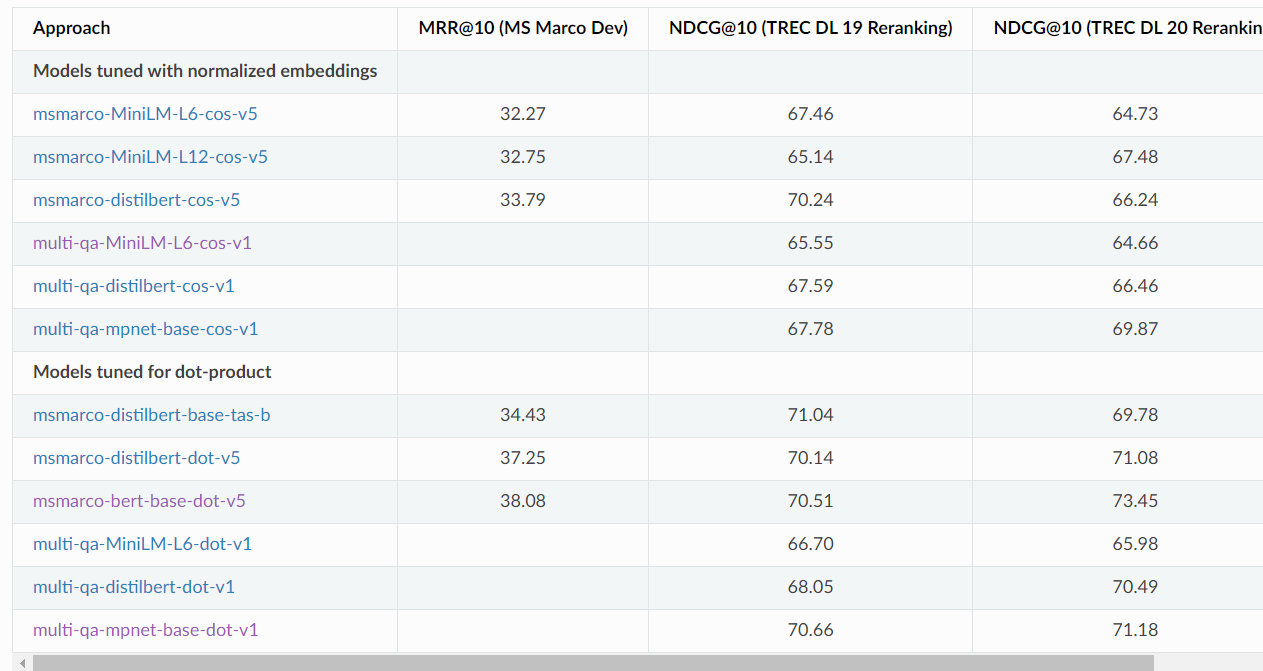

### Best Multi-QA (dot product)
**'multi-qa-mpnet-base-dot-v1'**

https://huggingface.co/sentence-transformers/multi-qa-mpnet-base-dot-v1

From docs:
- Suitable score functions: **dot-product (e.g. util.dot_score)**
- Produces normalized embeddings: **No**
- 768 dimensional embeddings
- Text limit: **512 tokens**
- Pooling method: CLS pooling

In [337]:
#Load the model
model_repo = 'sentence-transformers/'
model_name = 'multi-qa-mpnet-base-dot-v1'

model_path = model_repo + model_name

doc_emb = sentence_embedding(processed_docs, model_path)
query_emb = sentence_embedding(query_list, model_path)

update_top_n_docs(model_name, query_emb, doc_emb, top_k=5, sim_function=util.dot_score)

In [339]:
model_dict_indices['multi-qa-mpnet-base-dot-v1']

{'query_1': [19, 35, 2, 41, 21],
 'query_2': [2, 20, 21, 16, 19],
 'query_3': [8, 7, 51, 3, 50]}

In [329]:
processed_docs[19]

'12Du kan få dagpenge i to år inden for en periode på tre år. Perioden opgøres som 3.848 timer inden for en periode på 36 måneder. Får du dagpenge fordi du er færdig med en uddannelse, er din dagpengeperiode dog kun på 1 år som skal bruges indenfor 2 år. Du bruger af timerne, når du:• Får udbetalt dagpenge, herunder også  dagpenge under sygdom• Får udbetalt feriedagpenge    • Afvikler karantæne• Er ansat i job med løntilskud     • Deltager i jobrettet uddannelseHvis du bliver syg, mens du modtager dagpenge, vil timerne for de første seks uger, som du får dagpenge under sygdom eller sygedagpenge for, blive trukket fra dine dagpengetimer. Det gælder hver gang, du melder dig syg.'

In [261]:
#Simpler version not logging top index 

"""
doc_emb = model.encode(processed_docs)

for query in [query_1, query_2, query_3]:
    query_emb = model.encode(query)
    scores = util.dot_score(query_emb, doc_emb)[0].cpu().tolist()
    doc_score_pairs = list(zip(processed_docs, scores))
    doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)
    print(f'Query: {query} \n\n')
    for doc, score in doc_score_pairs[:5]:
        print(f'Document w. score {score} \n {doc} \n\n')
"""

"\ndoc_emb = model.encode(processed_docs)\n\nfor query in [query_1, query_2, query_3]:\n    query_emb = model.encode(query)\n    scores = util.dot_score(query_emb, doc_emb)[0].cpu().tolist()\n    doc_score_pairs = list(zip(processed_docs, scores))\n    doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)\n    print(f'Query: {query} \n\n')\n    for doc, score in doc_score_pairs[:5]:\n        print(f'Document w. score {score} \n {doc} \n\n')\n"

**Results are poor** 

The correct answer seem to be somewhere in top 5, but not the most similar

### Small Multi-QA (dot product)
**'multi-qa-MiniLM-L6-dot-v1'**

https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-dot-v1

*Note: the model was just trained on input text up to 250 word pieces. It might not work well for longer text.*

From docs:
- Suitable score functions: **dot-product (e.g. util.dot_score)**
- Produces normalized embeddings: **No**
- 384 dimensional embeddings
- Text limit: **512 tokens**

In [330]:
model_repo = 'sentence-transformers/'
model_name = 'multi-qa-MiniLM-L6-dot-v1'

model_path = model_repo + model_name

doc_emb = sentence_embedding(processed_docs, model_path)
query_emb = sentence_embedding(query_list, model_path)

update_top_n_docs(model_name, query_emb, doc_emb, top_k=5)

### Small multi-QA (cosine)
**'multi-qa-MiniLM-L6-cos-v1'**

https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1

Model trained on cos, better for retrieval of equal length sentences (for actual calculation dot is prefered as it is faster and produce same result in this normalized model)

*Note: the model was just trained on input text up to 250 word pieces. It might not work well for longer text.*

From docs:
- Suitable score functions: **dot-product (util.dot_score), cosine-similarity (util.cos_sim), or euclidean distance**
- Produces normalized embeddings: **No**
- 384 dimensional embeddings
- Text limit: **512 tokens**
- Pooling method: **mean pooling**


In [331]:
model_repo = 'sentence-transformers/'
model_name = 'multi-qa-MiniLM-L6-cos-v1'
model_path = model_repo + model_name

doc_emb = sentence_embedding(processed_docs, model_path)
query_emb = sentence_embedding(query_list, model_path)

update_top_n_docs(model_name, query_emb, doc_emb, sim_function=util.cos_sim, top_k=5)

## MSMarco (Asymetric search)

https://www.sbert.net/docs/pretrained-models/msmarco-v3.html

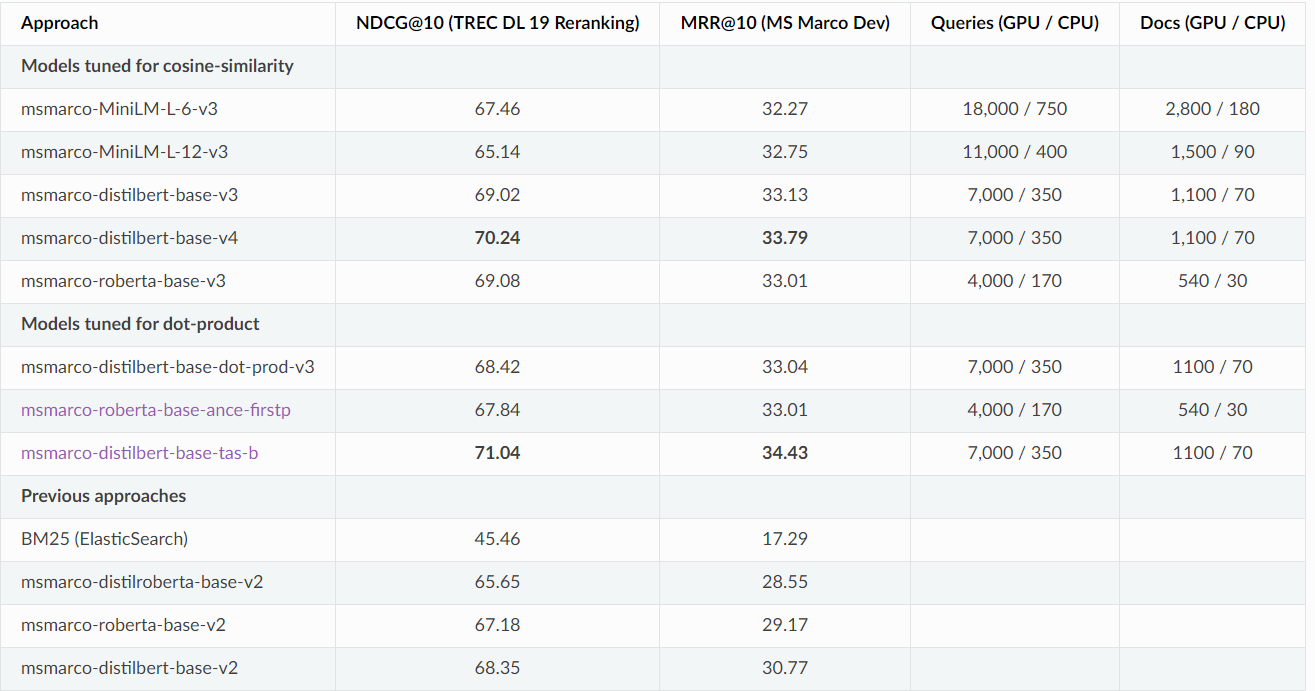


Nr 1 msmarco-distilbert-base-tas-b & 

Nr 2 msmarco-roberta-base-ance-firstp not easy to plug into sbert lib

### (3rd) Best model for asymetric dot-product search (short to long paragraphs)
**msmarco-distilbert-base-dot-prod-v3**


https://huggingface.co/sentence-transformers/multi-qa-MiniLM-L6-cos-v1

Model trained on cos, better for retrieval of equal length sentences (for actual calculation dot is prefered as it is faster and produce same result in this normalized model)

*Note: the model was just trained on input text up to 250 word pieces. It might not work well for longer text.*

From docs:
- Suitable score functions: **dot-product (util.dot_score) ?**
- Produces normalized embeddings: **No**
- 768 dimensional embeddings
- Text limit: **512 tokens**
- Pooling method: **CLS pooling**


In [333]:
model_name = 'msmarco-distilbert-base-dot-prod-v3'
model_path = model_repo + model_name

doc_emb = sentence_embedding(processed_docs, model_path)
query_emb = sentence_embedding(query_list, model_path)

update_top_n_docs(model_name, query_emb, doc_emb, sim_function=util.dot_score, top_k=5)

## SBERT Multilingual
**paraphrase-multilingual-MiniLM-L12-v2**


https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

Multi-lingual verson of https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L12-v2

...The larger paraphrase-multilingual-mpnet-base-v2 is ALSO only trained on 128 len text..

**Note: 128 input token limit!**

From docs:
- Suitable score functions: **??**
- Produces normalized embeddings: **No**
- 384 dimensional embeddings
- Text limit: **128 tokens**
- Pooling method: **mean pooling**


In [351]:
model_repo = 'sentence-transformers/'
model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
model_path = model_repo + model_name

doc_emb = sentence_embedding(processed_docs, model_path)
query_emb = sentence_embedding(query_list, model_path)

update_top_n_docs(model_name, query_emb, doc_emb, sim_function=util.cos_sim, top_k=5)

#Tested dot, minor difference but seems to be better with cos_sim
#update_top_n_docs(model_name+'_dot', query_emb, doc_emb, sim_function=util.dot_score, top_k=5)

In [335]:
#More efficient way to do the index search...
most_similar = util.semantic_search(query_emb,
                     doc_emb,
                     query_chunk_size=100,
                     corpus_chunk_size=100,
                     top_k=5,
                     score_function=util.cos_sim,
                     )

most_similar

[[{'corpus_id': 38, 'score': 0.7106657028198242},
  {'corpus_id': 40, 'score': 0.6885467767715454},
  {'corpus_id': 39, 'score': 0.6373744606971741},
  {'corpus_id': 19, 'score': 0.5870951414108276},
  {'corpus_id': 30, 'score': 0.5412706136703491}],
 [{'corpus_id': 19, 'score': 0.797722578048706},
  {'corpus_id': 20, 'score': 0.7388540506362915},
  {'corpus_id': 31, 'score': 0.7360708713531494},
  {'corpus_id': 43, 'score': 0.7280766367912292},
  {'corpus_id': 30, 'score': 0.7058415412902832}],
 [{'corpus_id': 7, 'score': 0.5548719763755798},
  {'corpus_id': 3, 'score': 0.5511521100997925},
  {'corpus_id': 18, 'score': 0.5381993651390076},
  {'corpus_id': 4, 'score': 0.5350481271743774},
  {'corpus_id': 12, 'score': 0.5047981142997742}]]

# Microsoft E5 multi-lingual


In [341]:
from sentence_transformers import SentenceTransformer

model_repo = 'intfloat/'
model_name = 'multilingual-e5-small'
model_path = model_repo + model_name

#Append 'query:' to each query text and save as e5_query_list
#Append 'passage:' to each doc text and save as e5_docs
e5_query_list = ['query: '+query for query in query_list]
e5_docs = ['passage: '+doc for doc in processed_docs]

doc_emb = sentence_embedding(e5_docs, model_path, normalize_emb=True)
query_emb = sentence_embedding(e5_query_list, model_path, normalize_emb=True)

update_top_n_docs(model_name, query_emb, doc_emb, sim_function=util.cos_sim, top_k=5)


## Plot results

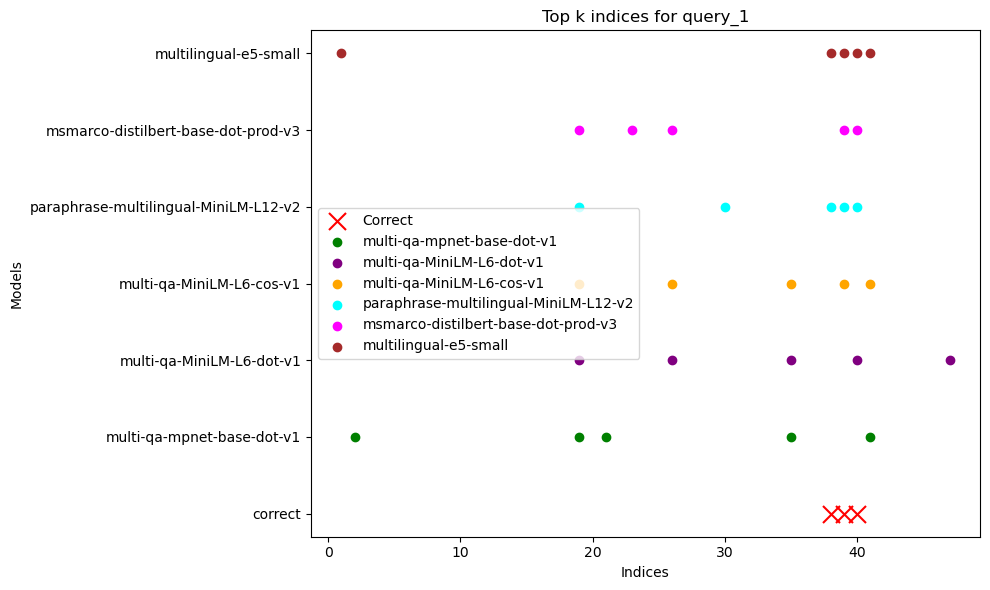

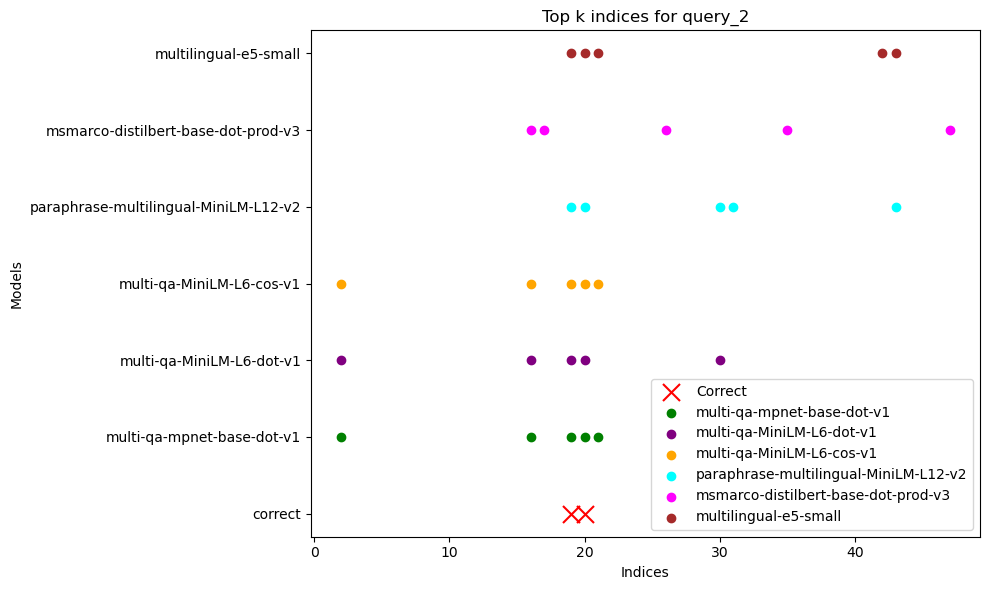

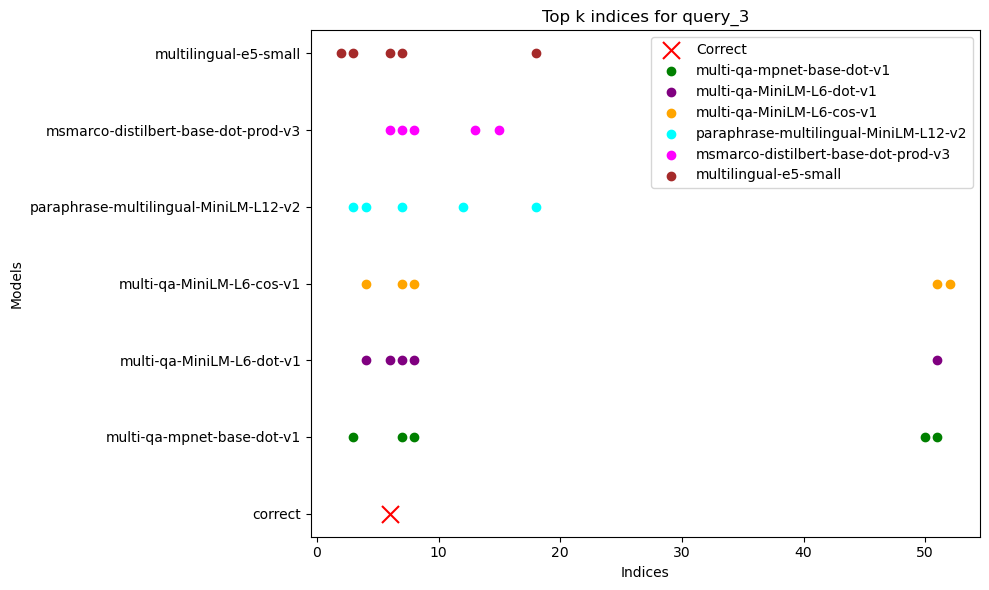

In [353]:
model_names = list(model_dict_indices.keys())
correct_y_position = model_names.index('correct')
color_list = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'olive']

for query_key in ['query_1', 'query_2', 'query_3']:
    plt.figure(figsize=(10, 6))

    # Plotting correct indices at the appropriate y-coordinate
    plt.scatter(model_dict_indices['correct'][query_key], [correct_y_position] * len(model_dict_indices['correct'][query_key]), 
                marker='x', s=150, color='red', label='Correct')

    # Looping through models and plotting their indices
    for color, (model_key, model_data) in zip(color_list, model_dict_indices.items()):
        if model_key != 'correct':
            plt.scatter(model_data[query_key], [model_names.index(model_key)] * len(model_data[query_key]), 
                        color=color, label=model_key)

    plt.title(f'Top k indices for {query_key}')
    plt.xlabel('Indices')
    plt.ylabel('Models')
    plt.yticks(range(len(model_names)), model_names)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [354]:
#For each model key in the model_dict_indices dict, compare to see how many of the correct indices are in the top 5 results and print the result
#Do so for each of the 3 queries
for query_key in ['query_1', 'query_2', 'query_3']:
    print(f'Query: {query_key}')
    for model_key, model_data in model_dict_indices.items():
        if model_key != 'correct':
            correct_indices = model_dict_indices['correct'][query_key]
            model_indices = model_data[query_key]
            num_correct_in_top_5 = len(set(correct_indices).intersection(set(model_indices)))
            print(f'{model_key}: {num_correct_in_top_5} out of {len(correct_indices)} correct indices in top 5')
    print('\n')


Query: query_1
multi-qa-mpnet-base-dot-v1: 0 out of 3 correct indices in top 5
multi-qa-MiniLM-L6-dot-v1: 1 out of 3 correct indices in top 5
multi-qa-MiniLM-L6-cos-v1: 1 out of 3 correct indices in top 5
paraphrase-multilingual-MiniLM-L12-v2: 3 out of 3 correct indices in top 5
msmarco-distilbert-base-dot-prod-v3: 2 out of 3 correct indices in top 5
multilingual-e5-small: 3 out of 3 correct indices in top 5


Query: query_2
multi-qa-mpnet-base-dot-v1: 2 out of 2 correct indices in top 5
multi-qa-MiniLM-L6-dot-v1: 2 out of 2 correct indices in top 5
multi-qa-MiniLM-L6-cos-v1: 2 out of 2 correct indices in top 5
paraphrase-multilingual-MiniLM-L12-v2: 2 out of 2 correct indices in top 5
msmarco-distilbert-base-dot-prod-v3: 0 out of 2 correct indices in top 5
multilingual-e5-small: 2 out of 2 correct indices in top 5


Query: query_3
multi-qa-mpnet-base-dot-v1: 0 out of 1 correct indices in top 5
multi-qa-MiniLM-L6-dot-v1: 1 out of 1 correct indices in top 5
multi-qa-MiniLM-L6-cos-v1: 0 o

In [356]:
#Now sum up the number of correct indicies for each model for each query and print the result like "Model_name: X out of 6 correct indicies across all queries"
for model_key, model_data in model_dict_indices.items():
    if model_key != 'correct':
        correct_indices = set(model_dict_indices['correct']['query_1'] + model_dict_indices['correct']['query_2'] + model_dict_indices['correct']['query_3'])
        model_indices = set(model_data['query_1'] + model_data['query_2'] + model_data['query_3'])
        num_correct_in_top_5 = len(correct_indices.intersection(model_indices))
        print(f'{model_key}: {num_correct_in_top_5} out of {len(correct_indices)} correct indices across all queries')

multi-qa-mpnet-base-dot-v1: 2 out of 6 correct indices across all queries
multi-qa-MiniLM-L6-dot-v1: 4 out of 6 correct indices across all queries
multi-qa-MiniLM-L6-cos-v1: 3 out of 6 correct indices across all queries
paraphrase-multilingual-MiniLM-L12-v2: 5 out of 6 correct indices across all queries
msmarco-distilbert-base-dot-prod-v3: 4 out of 6 correct indices across all queries
multilingual-e5-small: 6 out of 6 correct indices across all queries
